### Settings

In [1]:
which_data = 'c'
# 'c' for color images
# 'g' for grayscale
# 'f' for fourier


take_subset = True
# True to only use 2 classes
# False to use all 10
# note capitalization

do_PCA = True
components = 200
# True will run PCA to reduce the dimension before doing diffusion/LE
# False will skip this step
#
# if take_subset was set to False, I recommend doing PCA
#
# components is the number of components you get from PCA

## File Path
data_path = "C:\\Users\\Eli\\Documents\\DATA\\InclusiveImage_Unsupervised-master\\cifar" 

## Import libraries

In [2]:
exec(open("auxiliary\\imports.py").read())
%matplotlib inline

## Import raw data

In [3]:
exec(open("auxiliary\\loadCFAR.py").read())
## data: raw_images
## classes: cls
## index_labels: indices for each class

# for i in range(10):
#     print(index_labels[:, i])

Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_1
Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_2
Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_3
Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_4
Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_5


## Create grayscale and Fourier matrices (if desired)

In [4]:
# print(raw_images.shape)

if which_data == 'c':
    images = raw_images
    
elif which_data == 'g':
    images = np.zeros([50000,32,32])
    for i in range(50000):
        images[i,:,:] = 0.21*raw_images[i,:,:,0] + 0.72*raw_images[i,:,:,1] + 0.07*raw_images[i,:,:,2]
    
#     pylab.imshow(images[100,:,:], cmap = plt.get_cmap('gray'))
#     pylab.show()
    
elif which_data == 'f':
    images = np.zeros([50000, 32, 32])
    grayscale = np.zeros([50000,32,32])
    for i in range(50000):
        grayscale[i,:,:] = 0.21*raw_images[i,:,:,0] + 0.72*raw_images[i,:,:,1] + 0.07*raw_images[i,:,:,2]
        images[i,:,:] = np.fft.fft2(grayscale[i,:,:])
        images[i,:,:] = np.fft.fftshift(images[i,:,:])
        images[i,:,:] = np.abs(images[i,:,:])
    del grayscale
    
    
#     pylab.imshow(images[3,:,:], cmap = plt.get_cmap('gray'))
#     pylab.show()

## Convert original arrays to correct 3072 dim array per image

In [5]:
images=images.ravel()

if which_data == 'c':
    images = images.reshape(-1, 32*32*3)
else:
    images = images.reshape(-1, 32*32)

# Run PCA on image vectors

In [6]:
# #RUN PCA on images

# pca_color = PCA(n_components=150)
# pca_gray = PCA(n_components=100)
# pca_fourier = PCA(n_components=100)

if take_subset:
    if do_PCA:

        indices = np.array(index_labels[:,[0, 3]].reshape(index_labels[:, [0, 3]].size), dtype = np.intp)
        
        pca = PCA(n_components=components)
        pca.fit(images[indices])

        reduced = pca.transform(images[indices])
        classes = cls[indices]
    else:
        reduced = images[indices]
        classes = cls[indices]
    
else:
    if do_PCA:
        pca = PCA(n_components=components)

        pca.fit(images)

        reduced = pca.transform(images)
        classes = cls
    else:
        reduced = images
        classes = cls

## Do Diffusion Map

FOR 3 COMPONENTS
Diffusion Map Time Taken: 0:00:16.855138


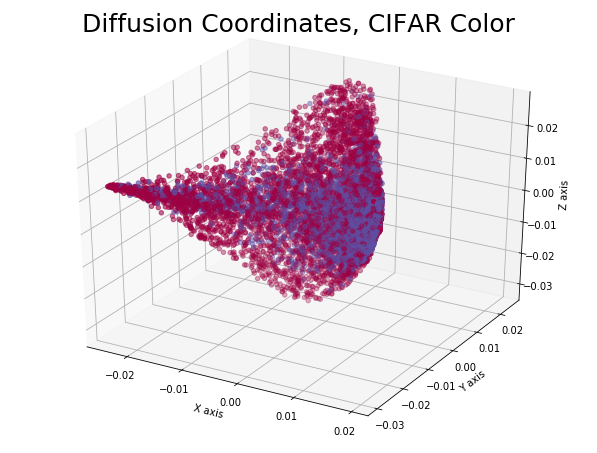

KNN ACCURACY: 0.7832
KNN Time Taken: 0:00:00.096320

##########################

#############################


FOR 10 COMPONENTS
Diffusion Map Time Taken: 0:00:13.999474


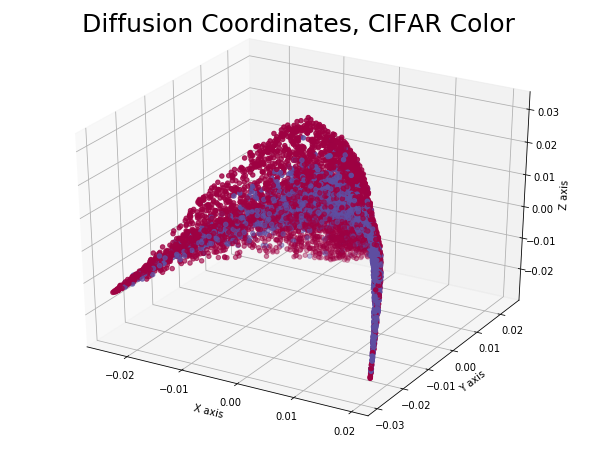

KNN ACCURACY: 0.8276
KNN Time Taken: 0:00:00.147232

##########################

#############################


FOR 20 COMPONENTS
Diffusion Map Time Taken: 0:00:12.113660


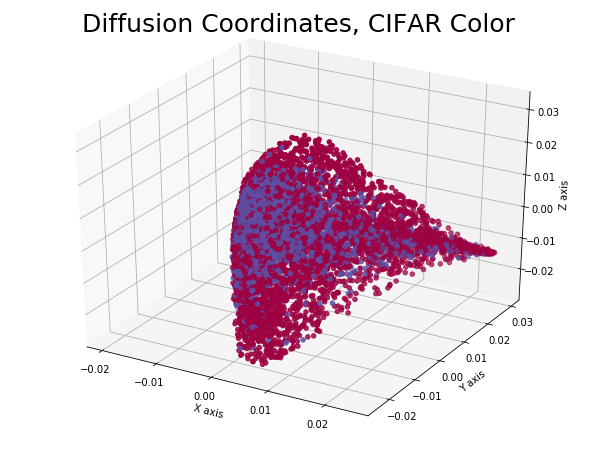

KNN ACCURACY: 0.838
KNN Time Taken: 0:00:00.476629

##########################

#############################


FOR 50 COMPONENTS
Diffusion Map Time Taken: 0:00:13.536317


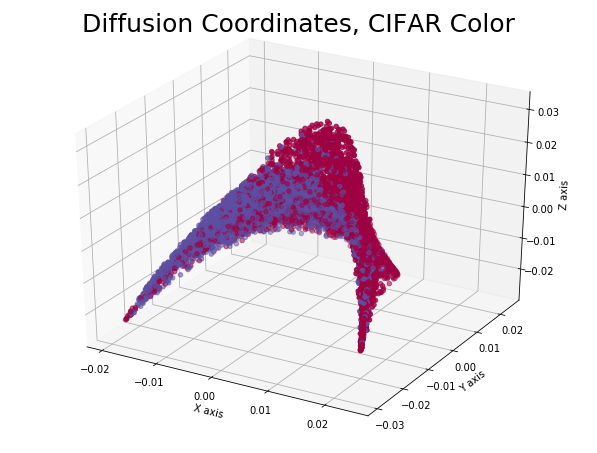

KNN ACCURACY: 0.8472
KNN Time Taken: 0:00:01.733779

##########################

#############################


FOR 100 COMPONENTS
Diffusion Map Time Taken: 0:00:16.200320


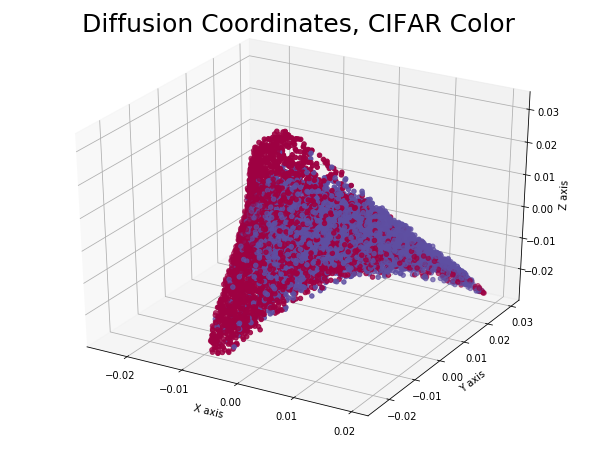

KNN ACCURACY: 0.8464
KNN Time Taken: 0:00:04.522095

##########################

#############################


FOR 150 COMPONENTS
Diffusion Map Time Taken: 0:00:22.019066


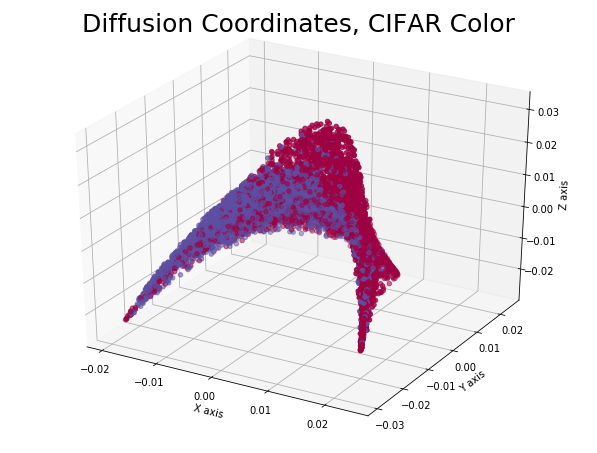

KNN ACCURACY: 0.8508
KNN Time Taken: 0:00:06.427553

##########################

#############################




In [7]:
coords=[3,10,20,50,100,150]
for i in coords:
    num_coord = i
    neighbors = 35
    eps = 12000
    alph = 1

    doPlot = True
    doKNN = True
    doSVM = False

    data = reduced
    title = "Diffusion Coordinates, CIFAR Color"
    
    print("FOR " + str(i) + " COMPONENTS")

    exec(open("auxiliary\\doDiffusion.py").read())
    
    print("#############################\n\n")

## LAPLACIAN EIGENMAPS

FOR 3 COMPONENTS
Laplacian Eigenmap Time Taken: 0:01:33.290568


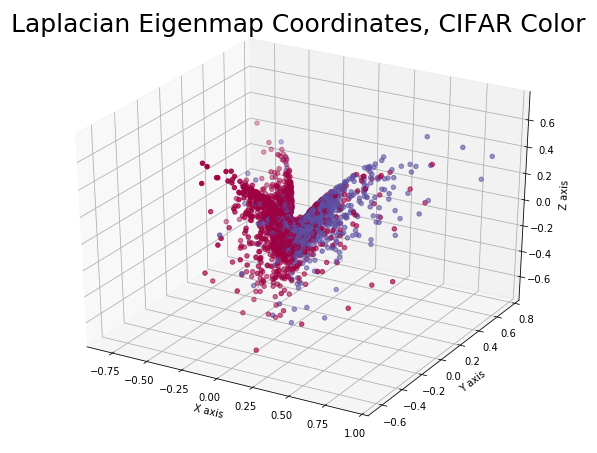

KNN Accuracy: 0.7408
KNN Time Taken: 0:00:00.035936

##########################

#############################


FOR 10 COMPONENTS
Laplacian Eigenmap Time Taken: 0:01:38.964005


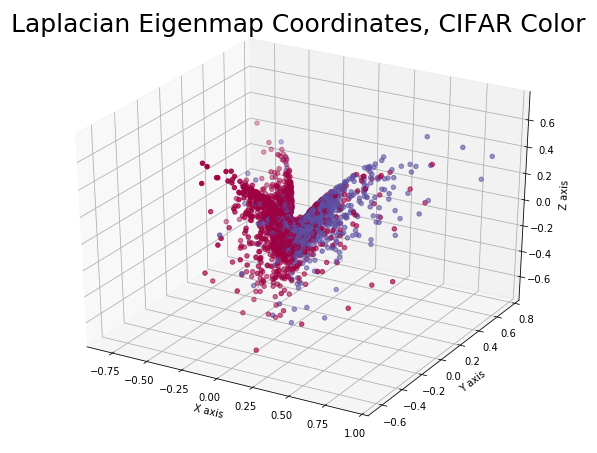

KNN Accuracy: 0.8128
KNN Time Taken: 0:00:00.169185

##########################

#############################


FOR 20 COMPONENTS
Laplacian Eigenmap Time Taken: 0:01:37.981846


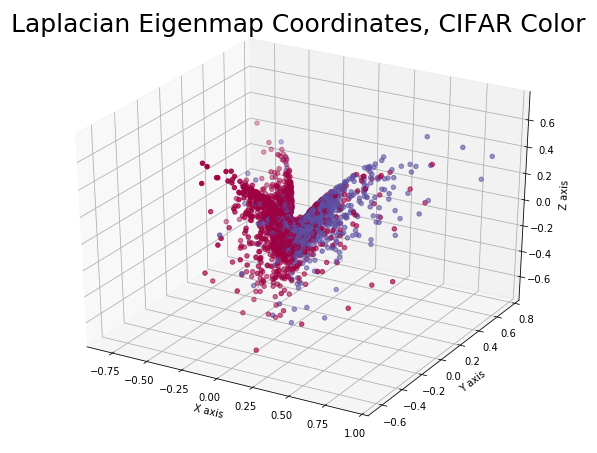

KNN Accuracy: 0.8228
KNN Time Taken: 0:00:00.512049

##########################

#############################


FOR 50 COMPONENTS
Laplacian Eigenmap Time Taken: 0:01:44.695364


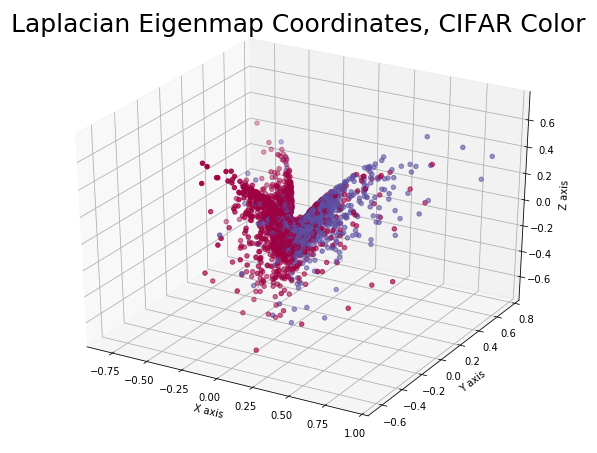

KNN Accuracy: 0.8432
KNN Time Taken: 0:00:01.814127

##########################

#############################


FOR 100 COMPONENTS
Laplacian Eigenmap Time Taken: 0:01:55.647503


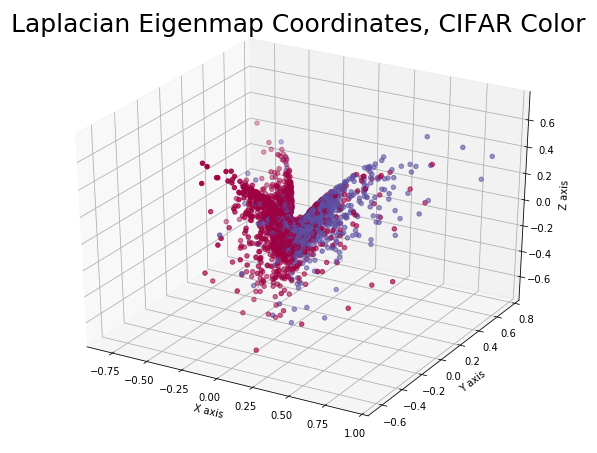

KNN Accuracy: 0.8416
KNN Time Taken: 0:00:04.491171

##########################

#############################


FOR 150 COMPONENTS
Laplacian Eigenmap Time Taken: 0:02:45.685978


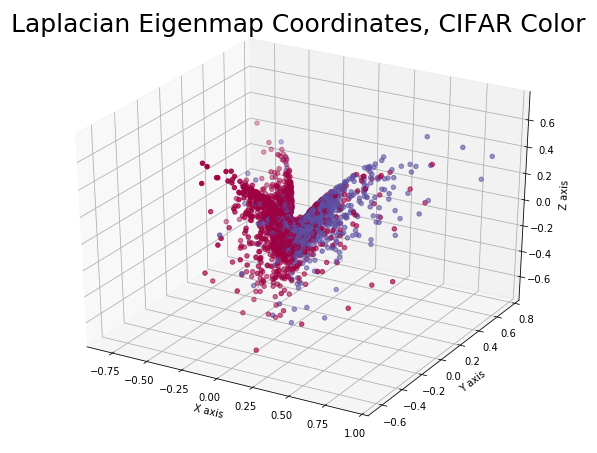

KNN Accuracy: 0.8372
KNN Time Taken: 0:00:08.126894

##########################

#############################




In [8]:
coords=[3,10,20,50,100,150]
for i in coords:
    num_coord = i
    neighbors = 50

    gam = .00001
    # the gamma for LE is 1/epsilon from DM
    # unused if we choose 0 and 1 weights

    doPlot = True
    doKNN = True
    doSVM = False

    data = reduced
    

    #exec(open("auxiliary\\doDiffusion.py").read())
    
    
    #del images
    #del raw_images
    title = "Laplacian Eigenmap Coordinates, CIFAR Color"
  
    print("FOR " + str(i) + " COMPONENTS")
    exec(open("auxiliary\\doLE.py").read())
    print("#############################\n\n")

## Plots

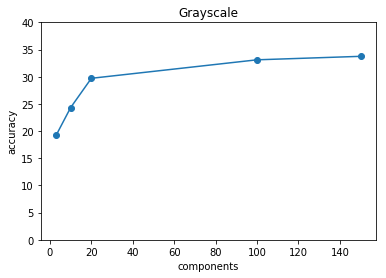

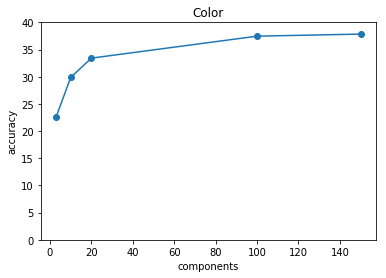

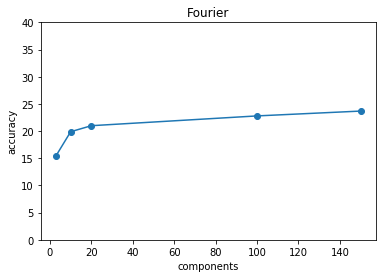

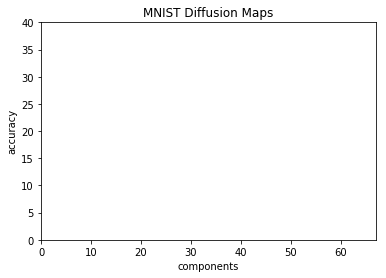

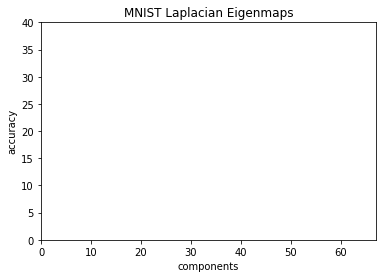

In [17]:
import matplotlib.pyplot as plt

componentsG=[3,10,20,100,150]
accuracyG=[19.24,24.33,29.71,33.11,33.75]

componentsC=[3,10,20,100,150]
accuracyC=[22.61,29.86,33.42,37.46,37.84]

componentsF=[3,10,20,100,150]
accuracyF=[15.50,19.88,20.99,22.79,23.68]

componentsMD=[3,10,20,64]
accuracyMDK=[93.56,96.44,96.89,97.33]

componentsML=[3,10,20,64]
accuracyMLSVM=[67.11,93.56,96.22,99.11]

plt.plot(componentsG, accuracyG, '-o')
plt.title('Grayscale')
plt.ylim((0, 40))
plt.xlabel('components')
plt.ylabel('accuracy')
plt.show()

plt.plot(componentsC, accuracyC, '-o')
plt.title('Color')
plt.ylim((0, 40))
plt.xlabel('components')
plt.ylabel('accuracy')
plt.show()

plt.plot(componentsF, accuracyF, '-o')
plt.title('Fourier')
plt.ylim((0, 40))
plt.xlabel('components')
plt.ylabel('accuracy')
plt.show()

plt.plot(componentsMD, accuracyMDK, '-o')
plt.title('MNIST Diffusion Maps')
plt.ylim((0, 40))
plt.xlabel('components')
plt.ylabel('accuracy')
plt.show()

plt.plot(componentsML, accuracyMLSVM, '-o')
plt.title('MNIST Laplacian Eigenmaps')
plt.ylim((0, 40))
plt.xlabel('components')
plt.ylabel('accuracy')
plt.show()